In [85]:
# import block
# matrix and dataframe tools
import numpy as np
import pandas as pd

# modeling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# plotting
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# utilities and options
from matplotlib.colors import ListedColormap
pd.set_option('display.max_columns', 100)
sns.set()

In [86]:
# load in the data
df = pd.read_csv('data/diabetic_data.csv', keep_default_na=False, na_values="?", low_memory=False)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


---
# Data Cleaning

In [87]:
# find NaN types
for c in df.columns:
    print(f'{c}:\t{df.loc[:,c].unique()}')
    print('===============================================================')

encounter_id:	[  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr:	[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race:	['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender:	['Female' 'Male' 'Unknown/Invalid']
age:	['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight:	[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id:	[6 1 2 3 4 5 8 7]
discharge_disposition_id:	[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id:	[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital:	[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code:	[nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty:	['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General'

In [88]:
# convert Unknown, Other to NaN
df = df.replace('Unknown/Invalid', np.nan)
df = df.replace('Other', np.nan)
df.loc[df['admission_type_id']==8, 'admission_type_id'] = np.nan # not mapped
df.loc[df['admission_type_id']==6, 'admission_type_id'] = np.nan # null
df.loc[df['admission_type_id']==5, 'admission_type_id'] = np.nan # not available
df.loc[df['discharge_disposition_id']==18, 'discharge_disposition_id'] = np.nan # null
df.loc[df['discharge_disposition_id']==25, 'discharge_disposition_id'] = np.nan # not mapped
df.loc[df['discharge_disposition_id']==26, 'discharge_disposition_id'] = np.nan # unknown
df.loc[df['discharge_disposition_id']==11, 'discharge_disposition_id'] = np.nan # expired
df.loc[df['discharge_disposition_id']==19, 'discharge_disposition_id'] = np.nan # expired
df.loc[df['discharge_disposition_id']==20, 'discharge_disposition_id'] = np.nan # expired
df.loc[df['discharge_disposition_id']==21, 'discharge_disposition_id'] = np.nan # expired
df.loc[df['admission_source_id']==9, 'admission_source_id'] = np.nan # not available
df.loc[df['admission_source_id']==15, 'admission_source_id'] = np.nan # not available
df.loc[df['admission_source_id']==17, 'admission_source_id'] = np.nan # null
df.loc[df['admission_source_id']==20, 'admission_source_id'] = np.nan # not mapped
df.loc[df['admission_source_id']==21, 'admission_source_id'] = np.nan # unknown

# count NaN percentage
nan_count = sorted(
    [(c,df[c].isna().sum()) for c in df.columns if df[c].isna().sum()>0],
    key=lambda x: x[1],
    reverse=True
    )
for c,cnt in nan_count:
    print(f'{c:<30} {cnt/df.shape[0]*100:<5.2f}% NaN')

weight                         96.86% NaN
medical_specialty              49.08% NaN
payer_code                     39.56% NaN
admission_type_id              10.22% NaN
admission_source_id            6.94 % NaN
discharge_disposition_id       6.22 % NaN
race                           3.71 % NaN
diag_3                         1.40 % NaN
diag_2                         0.35 % NaN
diag_1                         0.02 % NaN
gender                         0.00 % NaN


In [89]:
# https://www.hindawi.com/journals/bmri/2014/781670/tab2/
# decoding the columns based on data description

for i,r in df.iterrows():
    for t in range(3):
        if 'V' in str(r[f'diag_{t+1}']) or 'E' in str(r[f'diag_{t+1}']):
            df.loc[i,f'diag_{t+1}'] = 'Other'
        elif (float(r[f'diag_{t+1}'])>=390 and float(r[f'diag_{t+1}'])<=459) or float(r[f'diag_{t+1}'])==785:
            df.loc[i,f'diag_{t+1}'] = 'Circulatory'
        elif (float(r[f'diag_{t+1}'])>=460 and float(r[f'diag_{t+1}'])<=519) or float(r[f'diag_{t+1}'])==786:
            df.loc[i,f'diag_{t+1}'] = 'Respiratory'
        elif (float(r[f'diag_{t+1}'])>=520 and float(r[f'diag_{t+1}'])<=579) or float(r[f'diag_{t+1}'])==787:
            df.loc[i,f'diag_{t+1}'] = 'Digestive'
        elif float(r[f'diag_{t+1}'])-250>=0 and float(r[f'diag_{t+1}'])-250<1:
            df.loc[i,f'diag_{t+1}'] = 'Diabetes'
        elif float(r[f'diag_{t+1}'])>=800 and float(r[f'diag_{t+1}'])<=999:
            df.loc[i,f'diag_{t+1}'] = 'Injury'
        elif float(r[f'diag_{t+1}'])>=710 and float(r[f'diag_{t+1}'])<=739:
            df.loc[i,f'diag_{t+1}'] = 'Musculoskeletal'
        elif (float(r[f'diag_{t+1}'])>=580 and float(r[f'diag_{t+1}'])<=629) or float(r[f'diag_{t+1}'])==788:
            df.loc[i,f'diag_{t+1}'] = 'Genitourinary'
        elif float(r[f'diag_{t+1}'])>=140 and float(r[f'diag_{t+1}'])<=239:
            df.loc[i,f'diag_{t+1}'] = 'Neoplasms'
        else:
            df.loc[i,f'diag_{t+1}'] = 'Other'

for c in df.loc[:,['diag_1', 'diag_2', 'diag_3']].columns:
    print(f'{c}:\t{df.loc[:,c].unique()}\n')

diag_1:	['Diabetes' 'Other' 'Neoplasms' 'Circulatory' 'Respiratory' 'Injury'
 'Musculoskeletal' 'Digestive' 'Genitourinary']

diag_2:	['Other' 'Diabetes' 'Neoplasms' 'Circulatory' 'Respiratory' 'Injury'
 'Musculoskeletal' 'Genitourinary' 'Digestive']

diag_3:	['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Neoplasms'
 'Genitourinary' 'Musculoskeletal' 'Digestive']



In [90]:
# checking for duplicates
# drop duplicates but keep the ones with more time in hospital
df = df.sort_values(by='time_in_hospital').drop_duplicates(subset='patient_nbr',keep='last')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,NaN,1.0,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,Diabetes,Other,Other,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
71967,209564064,110301687,Caucasian,Male,[50-60),NaN,1.0,1.0,7.0,1,NaN,InternalMedicine,50,0,14,0,0,0,Respiratory,Other,Circulatory,9,None,>8,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
21228,74107590,875394,Caucasian,Male,[40-50),NaN,3.0,1.0,1.0,1,NaN,Cardiology,40,1,8,0,0,0,Circulatory,Diabetes,Other,6,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
21220,74080320,20894202,Caucasian,Female,[70-80),NaN,3.0,1.0,1.0,1,NaN,NaN,19,1,22,0,0,0,Circulatory,Circulatory,Circulatory,4,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
71951,209484756,60354225,Caucasian,Male,[70-80),NaN,1.0,NaN,7.0,1,MC,NaN,50,1,25,0,0,0,Injury,Circulatory,Injury,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86491,275076366,86384655,AfricanAmerican,Male,[40-50),NaN,1.0,6.0,7.0,14,MC,NaN,70,3,25,0,0,0,Digestive,Genitourinary,Genitourinary,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
22855,78473028,106097238,Hispanic,Female,[90-100),NaN,2.0,1.0,1.0,14,NaN,InternalMedicine,48,3,15,0,0,0,Injury,Other,Other,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,>30
6499,32090298,108507015,Caucasian,Male,[70-80),NaN,3.0,6.0,2.0,14,NaN,NaN,69,5,29,0,0,0,Neoplasms,Neoplasms,Genitourinary,7,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
6522,32176266,25969788,Caucasian,Male,[60-70),NaN,NaN,1.0,NaN,14,NaN,Family/GeneralPractice,114,5,32,0,0,0,Other,Respiratory,Other,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO


In [91]:
# dropping NaNs
# drop weight, medical_specialty, payer_code columns for too much NaNs
df = df.drop(columns=['weight','medical_specialty','payer_code'])
# drop encounter_id and patient_id for giving no information
df = df.drop(columns=['encounter_id', 'patient_nbr'])
# drop examide and citoglipton for having one unique value
df = df.drop(columns=['examide', 'citoglipton'])

# drop rows with NaN values in any column
df = df.dropna(how='any', axis=0)

# checking for any missing value withing the dataframe
df.isna().any().any()

False

In [92]:
df.shape

(56722, 43)

In [93]:
cols = ['gender', 'race','diag_1', 'diag_2', 'diag_3','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','diabetesMed','max_glu_serum', 'A1Cresult','change']
encoder = LabelEncoder()
for c in cols:
    if c in ['diag_1', 'diag_2', 'diag_3']:
        df[c] = encoder.fit_transform(df[c])
    # diagnosis
    df[c] = df[c].replace('')
    # race
    df[c] = df[c].replace('Caucasian', 0)
    df[c] = df[c].replace('AfricanAmerican', 1)
    df[c] = df[c].replace('Asian', 2)
    df[c] = df[c].replace('Hispanic', 3)
    # gender
    df[c] = df[c].replace('Female', 0)
    df[c] = df[c].replace('Male', 1)
    # meds
    df[c] = df[c].replace('No', 0)
    df[c] = df[c].replace('Steady', 1)
    df[c] = df[c].replace('Down', 2)
    df[c] = df[c].replace('Up', 3)
    # tests
    df[c] = df[c].replace('None', 0)
    df[c] = df[c].replace('Norm', 1)
    df[c] = df[c].replace('>200', 2)
    df[c] = df[c].replace('>300', 3)
    df[c] = df[c].replace('>7', 2)
    df[c] = df[c].replace('>8', 3)
    # change
    df[c] = df[c].replace('Ch', 1)
    # diabetes med
    df[c] = df[c].replace('Yes', 1)

# readmission
df['readmitted'] = df['readmitted'].replace('NO', 0)
df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'] = df['readmitted'].replace('<30', 2)
# age
df['age'] = df['age'].replace('[0-10)', 5)
df['age'] = df['age'].replace('[10-20)', 15)
df['age'] = df['age'].replace('[20-30)', 25)
df['age'] = df['age'].replace('[30-40)', 35)
df['age'] = df['age'].replace('[40-50)', 45)
df['age'] = df['age'].replace('[50-60)', 55)
df['age'] = df['age'].replace('[60-70)', 65)
df['age'] = df['age'].replace('[70-80)', 75)
df['age'] = df['age'].replace('[80-90)', 85)
df['age'] = df['age'].replace('[90-100)', 95)
# admission type id - https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission/notebook
df['admission_type_id'] = df['admission_type_id'].replace(2,1) # urgent
df['admission_type_id'] = df['admission_type_id'].replace(7,1) # trauma
# admission source - https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission/notebook
df['admission_source_id'] = df['admission_source_id'].replace(2,1) # clinic referal
df['admission_source_id'] = df['admission_source_id'].replace(3,1) # hmo
df['admission_source_id'] = df['admission_source_id'].replace(5,4) # transfer
df['admission_source_id'] = df['admission_source_id'].replace(6,4) # transfer
df['admission_source_id'] = df['admission_source_id'].replace(10,4) # transfer
df['admission_source_id'] = df['admission_source_id'].replace(22,4) # transfer
df['admission_source_id'] = df['admission_source_id'].replace(25,4) # transfer
df['admission_source_id'] = df['admission_source_id'].replace(13,11) # sick baby
df['admission_source_id'] = df['admission_source_id'].replace(14,11) # extramural birth
# discharge disposition - https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission/notebook
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1) # discharged home
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1) # discharged home
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1) # discharged home
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1) # discharged home
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2) # discharged to another facility
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2) # discharged and refered
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2) # discharged and refered
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2) # discharged to medical facility
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2) # discharged to rehab facility
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2) # discharged to long term care
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2) # discharged to nursing facility
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10) # discharged to another hospital
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10) # discharged to another hospital
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10) # discharged to another hospital
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10) # discharged to another hospital


df = df.reset_index(drop=True)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,1,55,1.0,1.0,7.0,1,50,0,14,0,0,0,8,7,0,9,0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,1,45,3.0,1.0,1.0,1,40,1,8,0,0,0,0,1,7,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,0,0,75,3.0,1.0,1.0,1,19,1,22,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,65,1.0,1.0,7.0,1,36,3,7,0,0,0,7,4,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,25,1.0,1.0,7.0,1,50,0,13,0,0,0,0,8,7,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56717,0,1,65,1.0,2.0,7.0,14,62,3,36,1,0,1,6,6,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56718,0,0,85,1.0,2.0,7.0,14,77,2,28,0,0,0,0,3,5,9,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
56719,1,1,45,1.0,1.0,7.0,14,70,3,25,0,0,0,2,3,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
56720,3,0,95,1.0,1.0,1.0,14,48,3,15,0,0,0,4,7,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


---
# Balancing Data

<Axes: xlabel='age'>

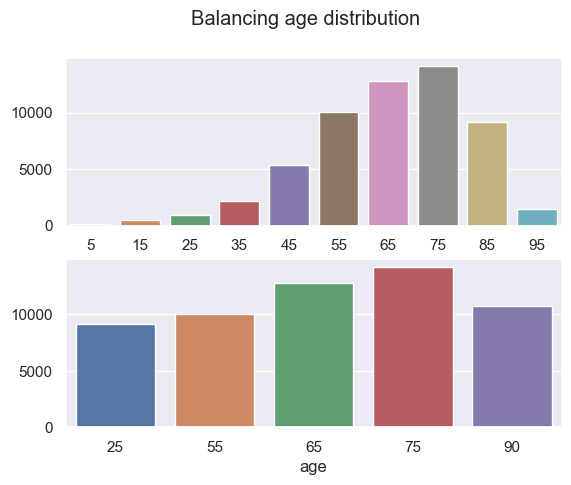

In [94]:
# visualizing age distribution
fig, axes = plt.subplots(2, 1)
fig.suptitle('Balancing age distribution')

ages = df.groupby('age').count()['race']
sns.barplot(ax=axes[0], x=ages.index.astype('str'), y=ages.values)


df['age'] = df['age'].replace(5,25)
df['age'] = df['age'].replace(15,25)
df['age'] = df['age'].replace(25,25)
df['age'] = df['age'].replace(35,25)
df['age'] = df['age'].replace(45,25)
df['age'] = df['age'].replace(85,90)
df['age'] = df['age'].replace(95,90)

balanced_ages = df.groupby('age').count()['race']
sns.barplot(ax=axes[1], x=balanced_ages.index.astype('str'), y=balanced_ages.values)

<Axes: xlabel='readmitted'>

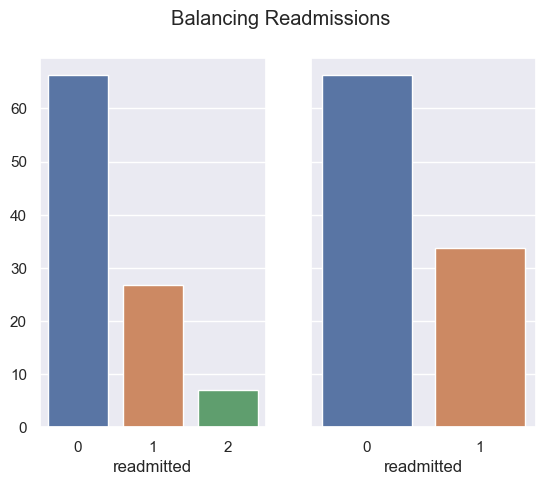

In [95]:
# readmission distribution
fig, axes = plt.subplots(1,2,sharey=True)
fig.suptitle('Balancing Readmissions')
t=df['readmitted'].value_counts()/df.shape[0]*100
sns.barplot(x=t.index, y=t.values, ax=axes[0])

df['readmitted'] = df['readmitted'].replace(2,1)

t=df['readmitted'].value_counts()/df.shape[0]*100
sns.barplot(x=t.index, y=t.values, ax=axes[1])

<Axes: xlabel='A1Cresult', ylabel='count'>

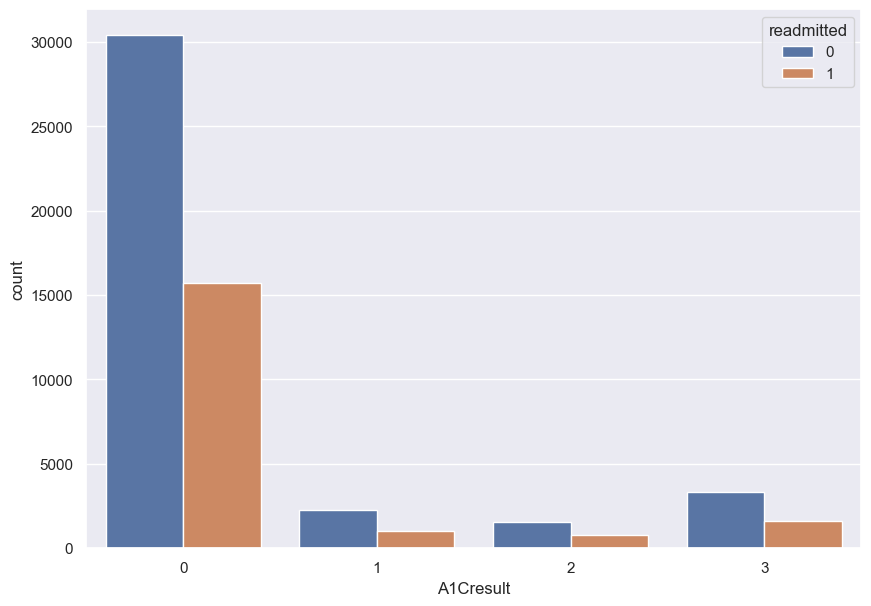

In [96]:
# A1Cresult test distribution
fig = plt.figure(figsize=(10,7))
a1c = df[['A1Cresult', 'readmitted']].groupby('readmitted')
sns.countplot(x=df['A1Cresult'].astype('object'),hue=df['readmitted'])

---
# Normalization / Standardization

/var/folders/xd/s2w980l53933j4xkhzvkjbmm0000gn/T/ipykernel_12532/2799897143.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slice['total']=slice['number_emergency']+slice['number_outpatient']+slice['number_inpatient']


[Text(0.5, 0, 'Number of medications')]

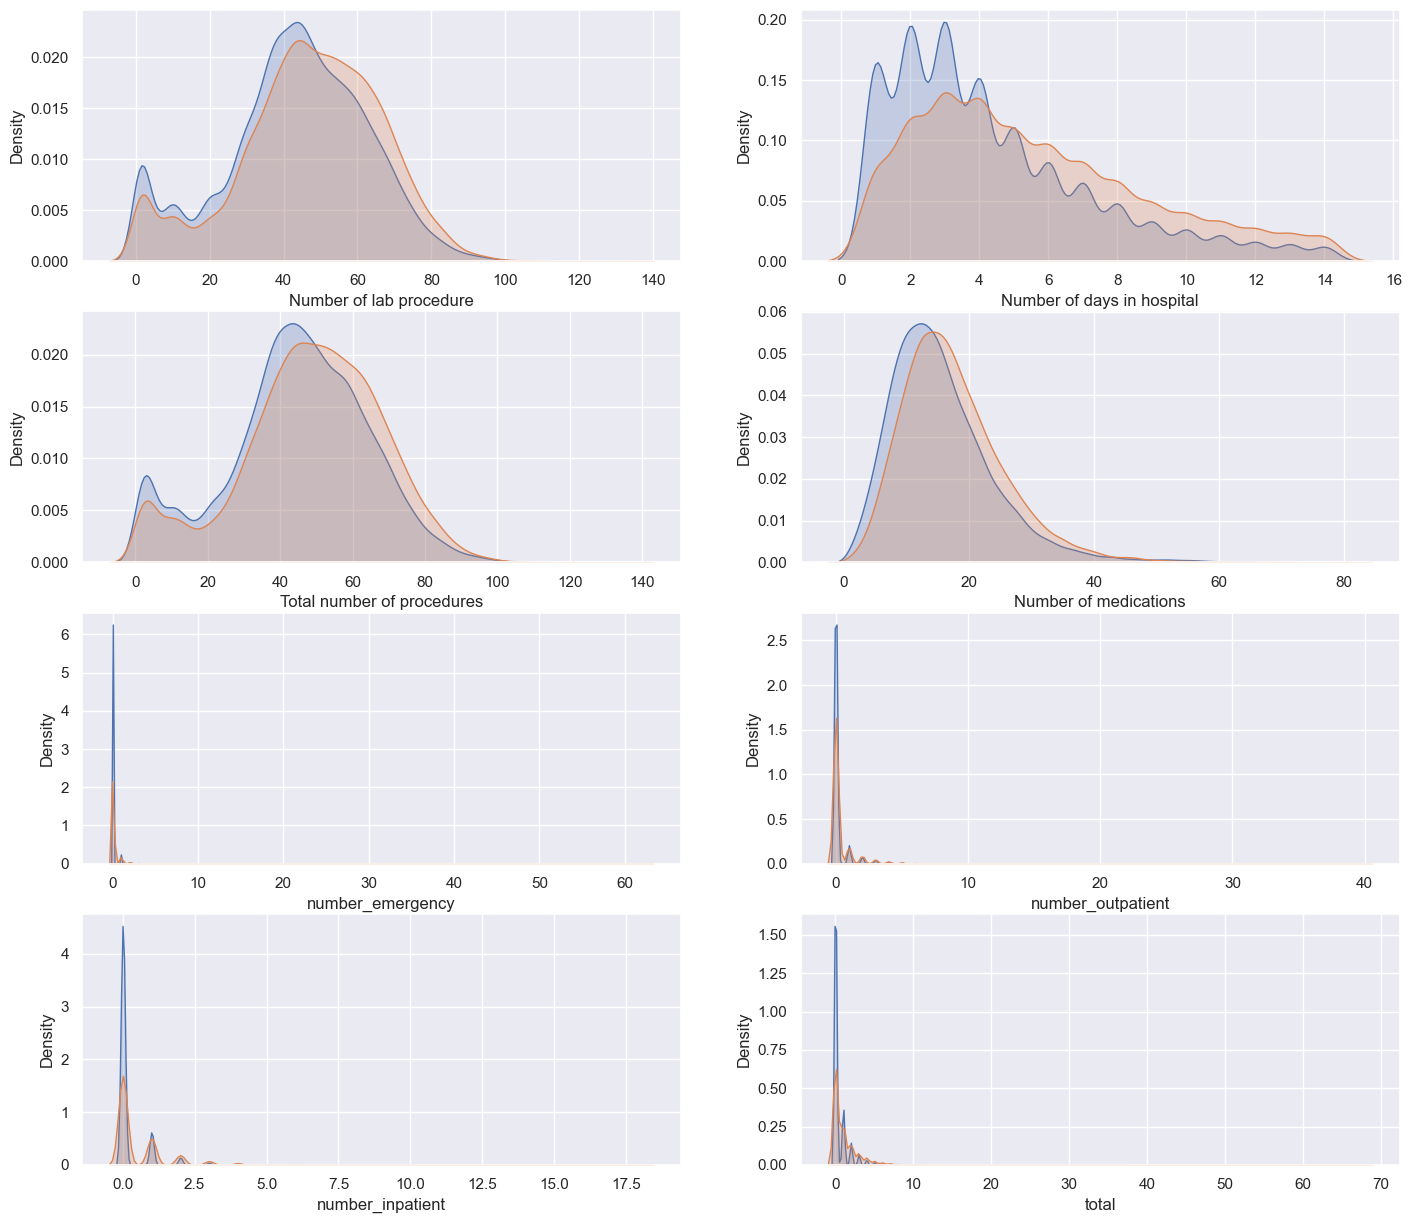

In [97]:
fig, axes = plt.subplots(4,2, figsize=(17,15))
sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] ,fill=True,label='Not readmitted', ax=axes[0,0])
sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] ,fill=True, label='readmitted', ax=axes[0,0])
sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] ,fill=True, label='Not readmitted', ax=axes[0,1])
sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] ,fill=True, label='readmitted', ax=axes[0,1])
sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] + df.loc[(df['readmitted'] == 0),'num_procedures'] ,fill=True, label='readmitted', ax=axes[1,0])
sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] + df.loc[(df['readmitted'] == 1),'num_procedures'] ,fill=True, label='readmitted', ax=axes[1,0])
sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_medications'] ,fill=True, label='readmitted', ax=axes[1,1])
sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_medications'] ,fill=True, label='readmitted', ax=axes[1,1])
slice = df[['number_emergency', 'number_outpatient', 'number_inpatient','readmitted']]
sns.kdeplot(slice.loc[(slice['readmitted'] == 0),'number_emergency'] ,fill=True, label='not readmitted', ax=axes[2,0])
sns.kdeplot(slice.loc[(slice['readmitted'] == 1),'number_emergency'] ,fill=True, label='readmitted', ax=axes[2,0])
sns.kdeplot(slice.loc[(slice['readmitted'] == 0),'number_outpatient'] ,fill=True, label='not readmitted', ax=axes[2,1])
sns.kdeplot(slice.loc[(slice['readmitted'] == 1),'number_outpatient'] ,fill=True, label='readmitted', ax=axes[2,1])
sns.kdeplot(slice.loc[(slice['readmitted'] == 0),'number_inpatient'] ,fill=True, label='not readmitted', ax=axes[3,0])
sns.kdeplot(slice.loc[(slice['readmitted'] == 1),'number_inpatient'] ,fill=True, label='readmitted', ax=axes[3,0])
slice['total']=slice['number_emergency']+slice['number_outpatient']+slice['number_inpatient']
sns.kdeplot(slice.loc[(slice['readmitted'] == 0),'total'] ,fill=True, label='not readmitted', ax=axes[3,1])
sns.kdeplot(slice.loc[(slice['readmitted'] == 1),'total'] ,fill=True, label='readmitted', ax=axes[3,1])

axes[0,0].set(xlabel='Number of lab procedure')
axes[0,1].set(xlabel='Number of days in hospital')
axes[1,0].set(xlabel='Total number of procedures')
axes[1,1].set(xlabel='Number of medications')

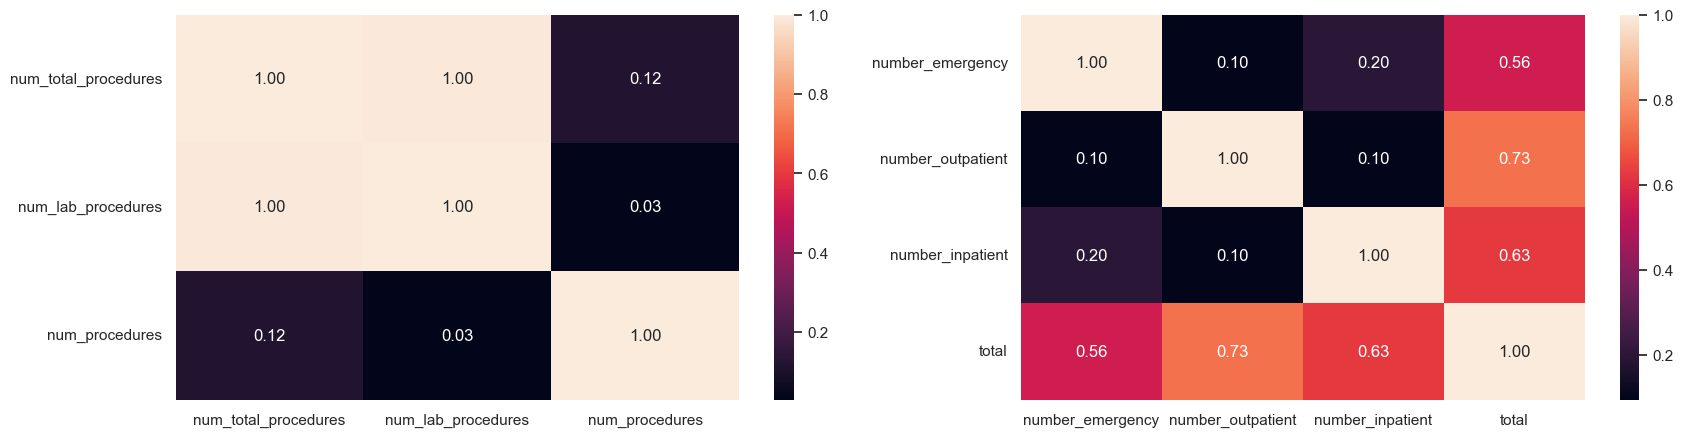

In [98]:
# combining columns based on kdeplot
df['num_total_procedures'] = df['num_lab_procedures']+df['num_procedures']
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.heatmap(df[['num_total_procedures', 'num_lab_procedures', 'num_procedures']].corr(), fmt='.2f', annot=True, ax=axes[0])
sns.heatmap(slice.drop(columns=['readmitted']).corr(), fmt='.2f', annot=True, ax=axes[1])
df = df.drop(columns=['num_lab_procedures', 'num_procedures'])

In [99]:
df[['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'readmitted']] = df[['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'readmitted']].astype('category')

In [100]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
norm = Normalizer()
numerics = df.select_dtypes(exclude='category')
numerics_sdv = scaler.fit_transform(numerics)
numerics_sdv_nrm = norm.fit_transform(numerics_sdv)
df_sdv_nrm = df.copy()
df_sdv_nrm[numerics.columns] = numerics_sdv_nrm

df_sdv_nrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56722 entries, 0 to 56721
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   race                      56722 non-null  category
 1   gender                    56722 non-null  category
 2   age                       56722 non-null  float64 
 3   admission_type_id         56722 non-null  category
 4   discharge_disposition_id  56722 non-null  category
 5   admission_source_id       56722 non-null  category
 6   time_in_hospital          56722 non-null  float64 
 7   num_medications           56722 non-null  float64 
 8   number_outpatient         56722 non-null  float64 
 9   number_emergency          56722 non-null  float64 
 10  number_inpatient          56722 non-null  float64 
 11  diag_1                    56722 non-null  category
 12  diag_2                    56722 non-null  category
 13  diag_3                    56722 non-null  cate

In [101]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_total_procedures
0,0,1,55,1.0,1.0,7.0,1,14,0,0,0,8,7,0,9,0,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,50
1,0,1,25,3.0,1.0,1.0,1,8,0,0,0,0,1,7,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,41
2,0,0,75,3.0,1.0,1.0,1,22,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,20
3,1,1,65,1.0,1.0,7.0,1,7,0,0,0,7,4,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,39
4,0,0,25,1.0,1.0,7.0,1,13,0,0,0,0,8,7,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56717,0,1,65,1.0,2.0,7.0,14,36,1,0,1,6,6,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65
56718,0,0,90,1.0,2.0,7.0,14,28,0,0,0,0,3,5,9,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,79
56719,1,1,25,1.0,1.0,7.0,14,25,0,0,0,2,3,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,73
56720,3,0,90,1.0,1.0,1.0,14,15,0,0,0,4,7,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,51


[Text(0.5, 0, 'A1Cresult')]

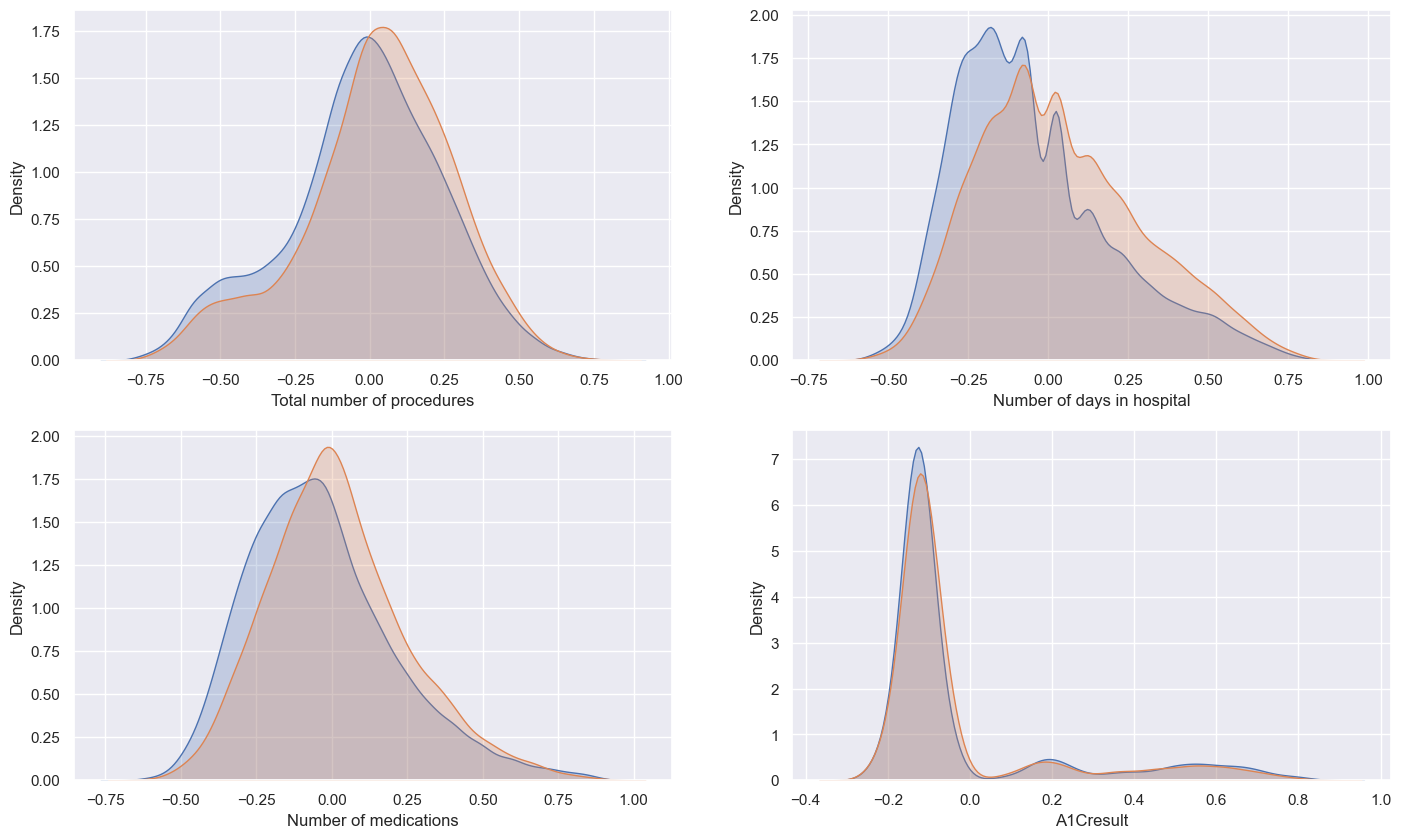

In [102]:
fig, axes = plt.subplots(2,2, squeeze=True, figsize=(17,10))
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 0),'num_total_procedures'] ,fill=True, label='Not readmitted', ax=axes[0,0])
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 1),'num_total_procedures'] ,fill=True, label='readmitted', ax=axes[0,0])
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 0),'time_in_hospital'] ,fill=True, label='Not readmitted', ax=axes[0,1])
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 1),'time_in_hospital'] ,fill=True, label='readmitted', ax=axes[0,1])
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 0),'num_medications'] ,fill=True, label='Not readmitted', ax=axes[1,0])
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 1),'num_medications'] ,fill=True, label='readmitted', ax=axes[1,0])
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 0),'A1Cresult'] ,fill=True, label='Not readmitted', ax=axes[1,1])
sns.kdeplot(df_sdv_nrm.loc[(df_sdv_nrm['readmitted'] == 1),'A1Cresult'] ,fill=True, label='readmitted', ax=axes[1,1])

axes[0,0].set(xlabel='Total number of procedures')
axes[0,1].set(xlabel='Number of days in hospital')
axes[1,0].set(xlabel='Number of medications')
axes[1,1].set(xlabel='A1Cresult')



---
# Correlation

<Axes: >

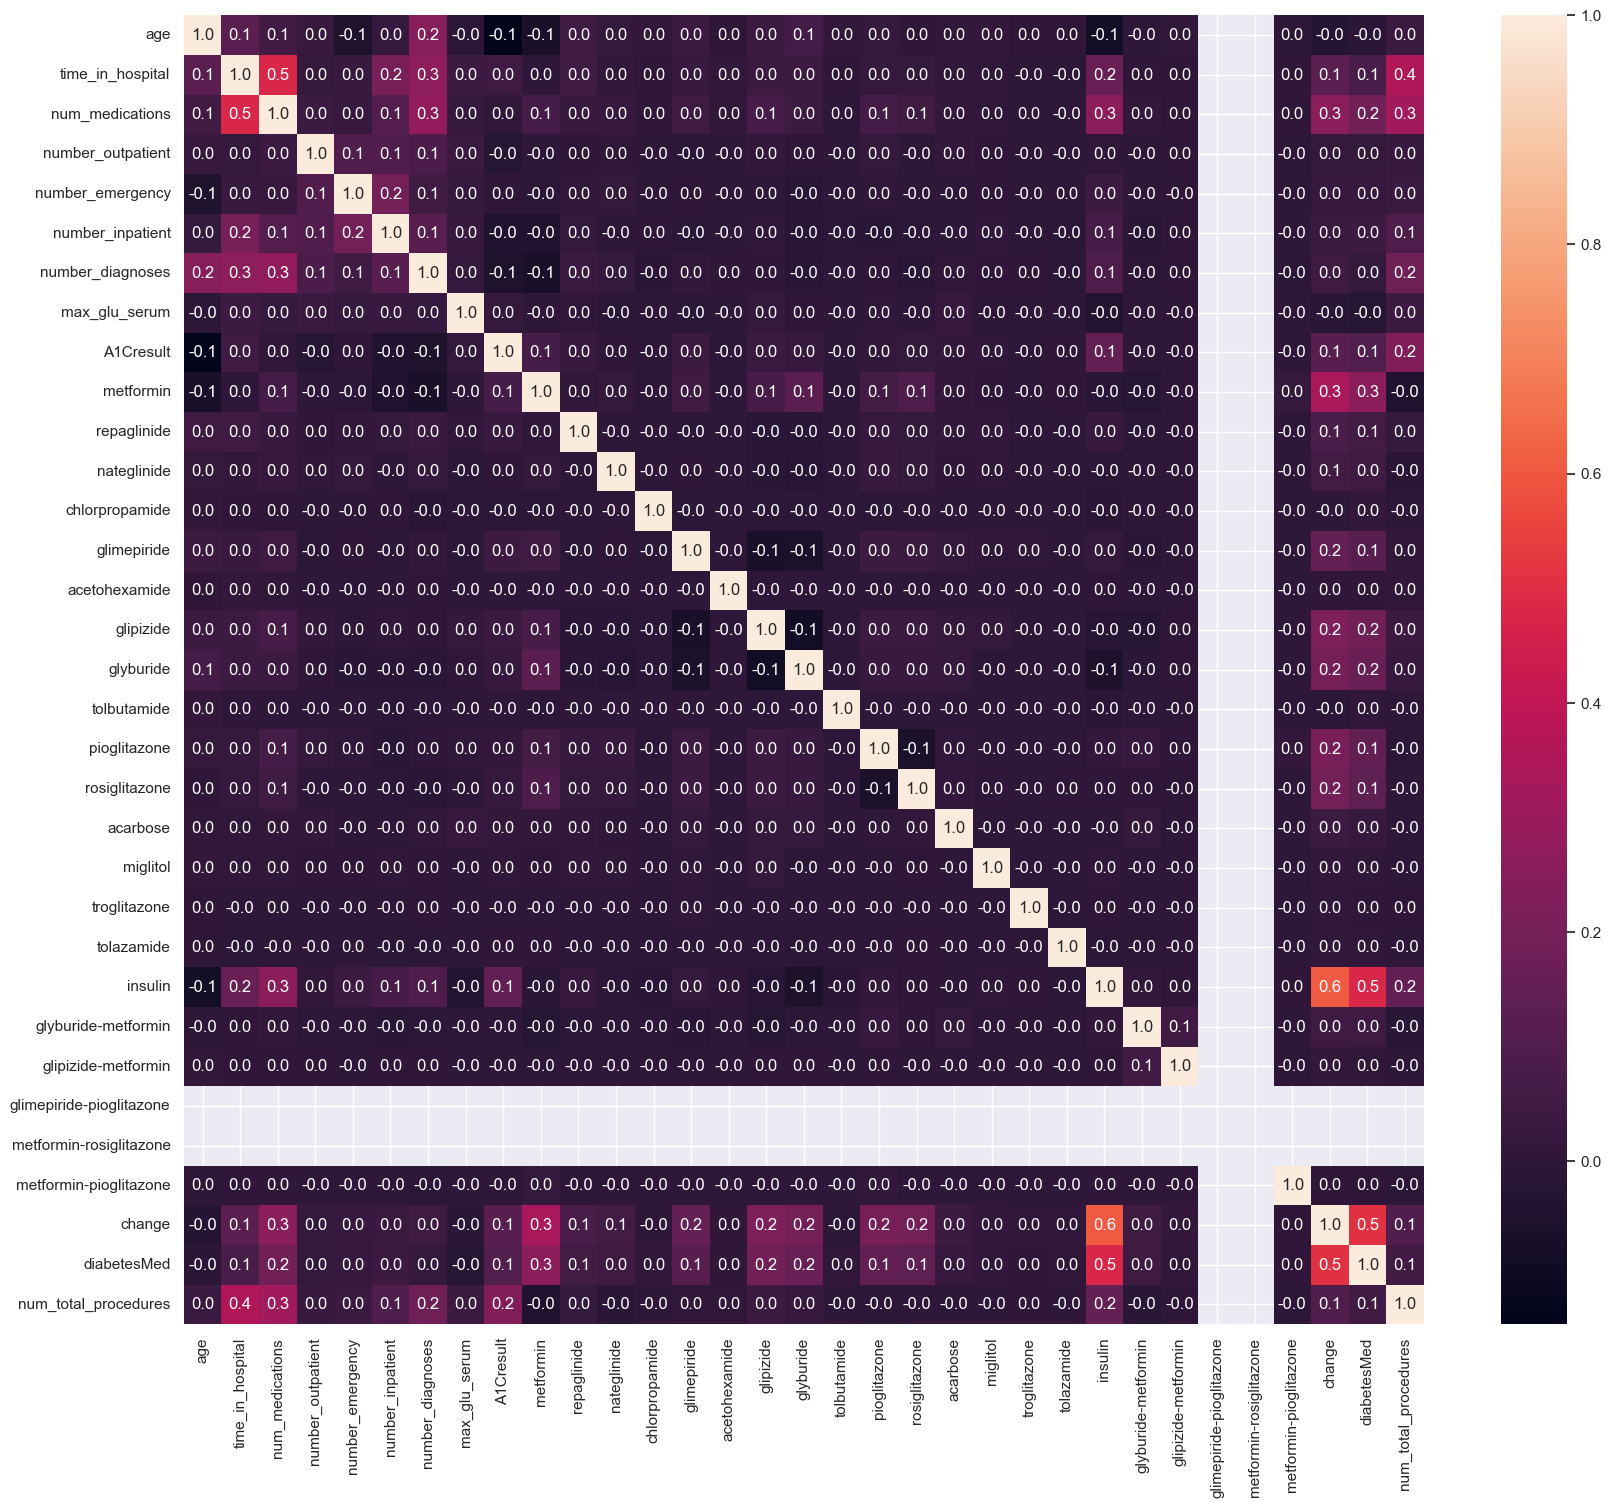

In [103]:
fig = plt.figure(figsize=(20,17))
sns.heatmap(df.corr(numeric_only=True), fmt='.1f', annot=True)

---
# Modeling

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Preparation

In [105]:
# raw data split
X = df_sdv_nrm.drop(columns=['readmitted'])
Y = df_sdv_nrm['readmitted']

In [106]:
# pca feature decomposition with 
pca = PCA(n_components='mle')

X_pca = pd.DataFrame(pca.fit_transform(X))

In [107]:
# train test split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,Y, test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [109]:
# https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization
estimator = LogisticRegression(random_state=10, max_iter=1000)
rfecv = RFECV(estimator=estimator, scoring='accuracy', cv=5)
rfecv.fit(x_train,y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 36
Best features : Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'num_total_procedures'],
      dtype='object')


In [110]:
for c in X.columns:
    if c not in X.columns[rfecv.support_]:
        x_test = x_test.drop(columns=[c])
        x_train = x_train.drop(columns=[c])
x_train

,race,gender,age,admission_type_id,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,num_total_procedures
25345,0,0,-0.115957,3.0,-0.062297,0.112792,-0.070139,-0.050403,-0.106704,7,2,1,0.075602,-0.013164,0.743143,-0.123635,-0.029486,-0.022427,-0.006192,-0.058294,-0.001103,-0.090850,-0.003659,-0.071236,-0.065512,-0.012289,-0.004169,-0.001560,-0.004272,-0.229496,-0.022379,-0.002702,-0.001103,-0.246296,-0.483947,-0.024892
21261,0,0,-0.130101,1.0,-0.162984,-0.148503,-0.078694,-0.056551,0.583360,3,3,3,0.235343,-0.014770,-0.128968,-0.138715,-0.033083,-0.025162,-0.006947,-0.065404,-0.001238,-0.101931,-0.004105,-0.079924,-0.073503,-0.013788,-0.004678,-0.001750,-0.004793,-0.257488,-0.025109,-0.003031,-0.001238,-0.276337,-0.542974,0.136532
36059,0,0,-0.442522,1.0,0.018226,-0.116700,-0.061841,-0.044440,-0.094080,7,0,7,0.066658,-0.011607,-0.101348,-0.109008,-0.025998,-0.019773,-0.005460,-0.051397,-0.000972,-0.080102,-0.003226,-0.062808,0.767726,-0.010835,-0.003676,-0.001375,-0.003767,-0.202345,-0.019732,-0.002382,-0.000972,-0.217157,0.125720,0.189535
47234,0,0,0.002259,1.0,0.047979,0.009167,-0.012483,-0.008971,0.092539,8,8,0,0.037333,0.986965,-0.020458,-0.022005,-0.005248,-0.003991,-0.001102,-0.010375,-0.000196,-0.016169,-0.000651,-0.012678,-0.011660,-0.002187,-0.000742,-0.000278,-0.000760,-0.040846,-0.003983,-0.000481,-0.000196,-0.043836,-0.086133,0.021658
48271,0,0,0.327292,1.0,0.263917,-0.069579,-0.068667,-0.049345,-0.104464,3,2,7,0.205355,-0.012888,-0.112534,-0.121039,-0.028867,-0.021956,-0.006062,-0.057070,-0.001080,-0.088943,-0.003582,-0.069740,-0.064137,-0.012031,-0.004082,-0.001527,-0.004183,-0.224678,-0.021909,-0.002645,-0.001080,-0.241125,0.139596,-0.533155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47644,0,1,0.276172,1.0,0.222696,0.346325,-0.057941,-0.041638,-0.088147,8,0,8,0.173280,-0.010875,-0.094957,0.314287,-0.024359,-0.018526,-0.005115,-0.048156,-0.000911,-0.075051,-0.003022,-0.058847,0.719314,-0.010152,-0.003444,-0.001289,-0.003529,0.030070,-0.018487,-0.002232,-0.000911,0.231450,0.117792,-0.020563
12363,0,0,0.402142,1.0,-0.274543,-0.269799,-0.084370,-0.060630,-0.128354,0,3,0,0.252318,-0.015835,-0.138270,-0.148720,-0.035469,-0.026977,-0.007449,-0.070122,-0.001327,-0.109283,-0.004401,-0.085689,-0.078805,-0.014782,-0.005015,-0.001876,-0.005139,-0.276061,-0.026920,-0.003250,-0.001327,-0.296269,-0.582139,-0.110089
10948,0,0,0.222713,1.0,-0.359637,-0.208563,-0.110521,-0.079422,-0.168137,0,0,0,0.330524,-0.020743,-0.181127,-0.194816,-0.046463,-0.035338,-0.009757,-0.091856,-0.001738,-0.143156,-0.005765,-0.112248,-0.103230,-0.019364,-0.006570,-0.002458,-0.006732,0.057357,-0.035264,-0.004257,-0.001738,-0.388097,0.224683,-0.522166
19207,0,1,0.172521,1.0,-0.177314,-0.311178,-0.085613,-0.061523,-0.130245,7,7,1,-0.235226,-0.016068,-0.140307,-0.150911,-0.035992,-0.027374,-0.007558,-0.071155,-0.001346,-0.110893,-0.004466,-0.086951,-0.079966,-0.015000,-0.005089,-0.001904,-0.005215,-0.280127,-0.027316,-0.003298,-0.001346,-0.300633,-0.590714,0.392516


## Clustering

In [198]:
# kmeans clustering
kmeans_model = KMeans(n_clusters=2, n_init=10) # readmission yes/no
km_res = kmeans_model.fit_predict(X)
print(classification_report(Y,km_res, target_names=['readmitted', 'not readmitted']))

                precision    recall  f1-score   support

    readmitted       0.66      0.55      0.60     37578
not readmitted       0.33      0.43      0.38     19144

      accuracy                           0.51     56722
     macro avg       0.49      0.49      0.49     56722
  weighted avg       0.55      0.51      0.52     56722



In [199]:
# kmeans clustering - pca
kmeans_model = KMeans(n_clusters=2, n_init=10) # readmission yes/no
km_res_pca = kmeans_model.fit_predict(X_pca)
print(classification_report(Y,km_res_pca))

              precision    recall  f1-score   support

           0       0.66      0.55      0.60     37578
           1       0.33      0.43      0.38     19144

    accuracy                           0.51     56722
   macro avg       0.49      0.49      0.49     56722
weighted avg       0.55      0.51      0.52     56722



## Classification

In [200]:
# knn
scores = []
for i in range(10,60):
    report = classification_report(y_test,KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train).predict(x_test), output_dict=True)
    scores.append((i,report))

best K value: 52


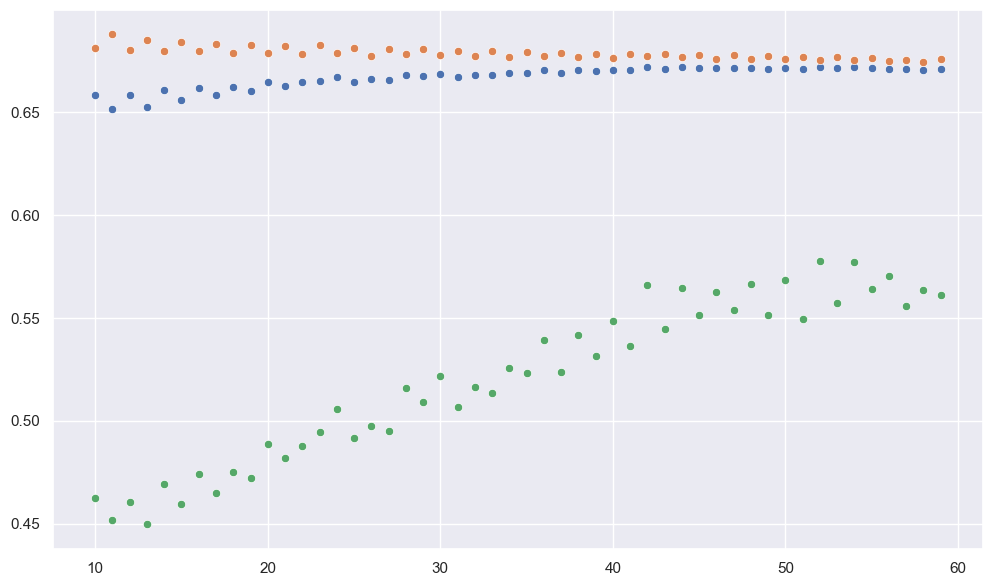

In [201]:
plot = {'index':[], 'acc':[], '0':[], '1':[]}
for x,y in scores:
    plot['index'].append(x)
    plot['acc'].append(y['accuracy'])
    plot['0'].append(y['0']['precision'])
    plot['1'].append(y['1']['precision'])
    
fig = plt.figure(figsize=(12,7))
sns.scatterplot(x=plot['index'], y=plot['acc'], legend='full')
sns.scatterplot(x=plot['index'], y=plot['0'])
sns.scatterplot(x=plot['index'], y=plot['1'])

argmax_score = sorted(scores, key=lambda x: x[1]['0']['precision']+x[1]['1']['precision'], reverse=True)
print('best K value:',argmax_score[0][0])

In [202]:
dtree_model = DecisionTreeClassifier()
dtree_res = dtree_model.fit(x_train,y_train).predict(x_test)
print(classification_report(y_test, dtree_res))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69     11338
           1       0.39      0.41      0.40      5679

    accuracy                           0.59     17017
   macro avg       0.54      0.54      0.54     17017
weighted avg       0.59      0.59      0.59     17017

